# L5. Continuous Distributions

## L5.1 The probability density function (pdf)
A random variable is called **continuous** if there is a nonnegative function $f$, called the **probability density function**, or pfd, such that

$$P(X \in B) = \int_B{f_X(x)dx}$$

for every (or almost every...actually every measurable) subset $B$ of the real line. In particular,

$$P(a \le X \le b) = \int_a^b{f_X(x)dx}$$


Probability of zero means something a little different from the discrete case... Really means something like negligable, not that it can't happen at all. For a single value:

$$ P(X=a) = \int_a^a{f_X(x)dx} = 0$$

$$P(a \le X \le b) = P(a \le X < b) = P(a < X \le b) = P(a < X < b)$$

Since we must have $P(X \in \Omega) = 1$,

$$\int_{-\infty}^{\infty}{f_X(x)dx} = 1$$

So, the area under the pdf must equal to 1. To intepret what the pdf means, we can look at

$$P([x,x+\delta]) = \int_x^{x+\delta}{f_X(x)dx} \approx f_X(x)\delta$$

i.e., $f_X(x)$ is the probability mass per unit length near x.

The simplest example is the **uniform** distribution, $f_X(x) = 1$ in [0,1].

### Exercise. What is the uniform distribution in the interval [a,b]?

Recall that the **cumulative distribution function** (CDF) is defined as $F_X(x) = P(X \le x)$. This means that

$$F_X(x) = \int_{-\infty}^x{f_X(t)dt}$$

so, by the fundamental theorem of calculus,

$$f_X(x) = \frac{dF_X}{dx}$$

Matplotlib is building the font cache; this may take a moment.


(array([ 987., 1016., 1008.,  972.,  967.,  977., 1007., 1026., 1025.,
        1015.]),
 array([2.57681808e-04, 1.00221366e-01, 2.00185051e-01, 3.00148735e-01,
        4.00112420e-01, 5.00076104e-01, 6.00039789e-01, 7.00003474e-01,
        7.99967158e-01, 8.99930843e-01, 9.99894527e-01]),
 <BarContainer object of 10 artists>)

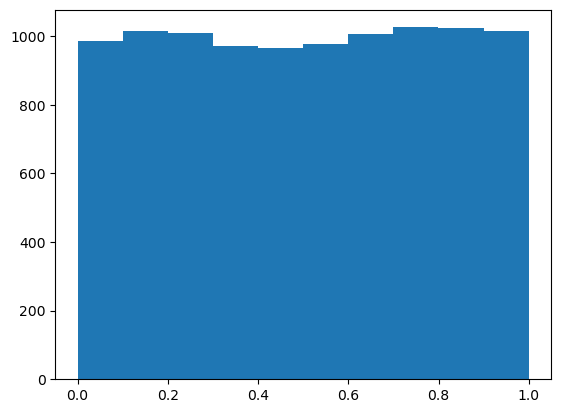

In [2]:
#Let's generate a uniform distribution using numpy
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

N = 10000
sample = np.random.uniform(size=N)
plt.hist(sample)

## L5.2 Expected value

For a continuous random variable, its expected value is

$$E[X] = \int_{-\infty}^{\infty}{xf_X(x)}$$

### Exercise: Find the expected value of the uniform distribution in [0,1]

In general,

$$E[g(X)] = \int_{-\infty}^{\infty}{g(x)f_X(x)}$$

so we can defined the variance and standard devision in the same way as before:

$$\text{Var}(X) = E[X^2-\bar{X}^2] = \int_{-\infty}^{\infty}{(x^2-\bar{x}^2)f_X(x)}$$

and the standard devision is the square root of the variance as before. The expected value is linear as before because the integral is a linear operator. 

Let's look at the **exponential** random variable with $f_X(x) = \lambda e^{-\lambda x}$ for $x \ge 0$. Let's first check that $f_X$ it is a pdf, and verify that the mean is $1/\lambda$. The variance is $1/\lambda^2$. Also, let's find the cumulative distribution function (CDF) $F_X(x) = P(X \le x)$.

The exponential random variable is useful to model the amount of time until next arrival of something (like a message or customer, or breakdown of something). It is closely related to the geometric random variable.

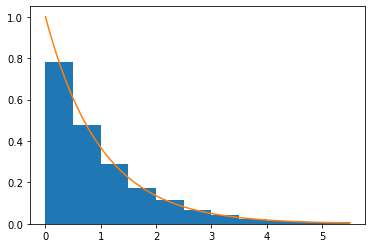

In [26]:
#Example simulating the arrival of the next customer?
lamb = 1 #Say, one hour mean

N = 10000
sample = np.random.exponential(scale=1/lamb, size=N) #scale = 1/lambda
plt.hist(sample,bins = [0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5],density=True)
x= np.linspace(0,5.5,100)
y = lamb*np.exp(-lamb*x)
plt.plot(x,y)

## L5.3 The normal distribution

A continuous random variable $X$ is called **normal** or **Gaussian** if it has the following pdf

$$f_X(x) = \frac{1}{\sqrt{2\pi} \sigma}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

where $\mu$ and $\sigma>0$ are paramaters that characterize the distribution. It can be verified that

$$\frac{1}{\sqrt{2\pi} \sigma} \int_{-\infty}^{\infty} {e^{-\frac{(x-\mu)^2}{2\sigma^2}}dx} = 1,$$

and that $E[X] = \mu$ (this one is easy) and std = $\sigma$ (need to integrate by parts to get this one).

When $\mu=0$ and $\sigma=1$ we talk about the **standard normal distribution**, and if $Y$ is any normal random variable with mean $\mu$ and standard deviation $\sigma$, then it can be written as $Y = \sigma X + \mu$ where $X$ is a standard normal random variable. More generally, if $X$ is a normal random variable, then $Y$ = $aX +b$ is also normal.

The CDF of the standard normal random variable is

$$ \Phi (x) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{x} {e^{-\frac{t^2}{2}}dt} $$

Books used to have (and still have) tables for $\Phi$ because it cannot be calcucalted using a simple formula, but nowadays we can use functions in python, excel, or pretty much any programming language to facility the calculations.

CSF:  0.5


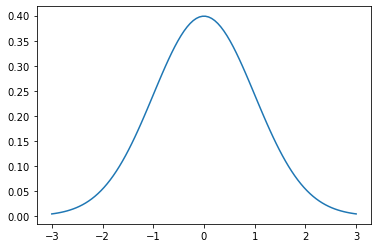

In [8]:
from scipy.stats import norm
print("CSF: ", norm.cdf(0))
x = np.linspace(-3,3,100)
y = norm.pdf(x)
plt.plot(x,y)

Because the standard normal is so common and easy to use, most people create the $Z$-score when working with a general normal variable:

$$Z = \frac{X-\mu}{\sigma}$$

but it converts the normal variable $X$ to a standardized normal variable $Z$. This is often used when computing the CDF of a general normal random variable $X$ as follows:

$$F_X(x) = \Phi (\frac{x-\mu}{\sigma})$$

Why is the normal variable so important? It has to do with the Central Limit Theorem, which we explore in next lecture. When dealing with a sum of indepedent random variables, discrete or continuous, they behave in many situations like a normal random variable.

Consider for example, the number of heads from tossing a coin. Let's suppose we toss a coin 200 times and want to exposure the sample mean of the number of heads. We can simulate this from a Bernoulli random variable, $X$, where $X=1$ denotes the head. Then, the number of heads, $Y$, is

$$Y = \sum_{i=1}^{200}{X_i}$$



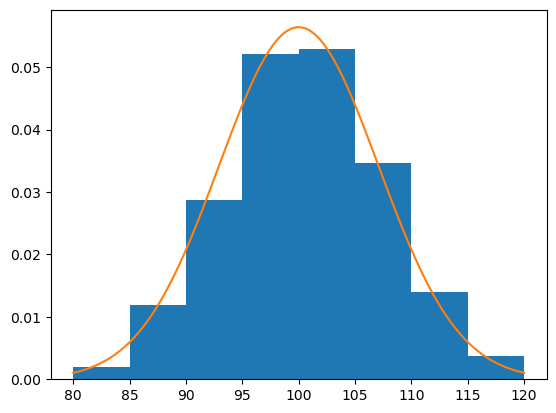

In [3]:
#Let's do a Monte Carlo
N = 1000 #Number of experiments
n = 200 #Number of tosses per experiment

result = []
for i in range(N):
    sample = np.random.choice(range(0,2), size=n)
    result.append(sum(sample))
    
plt.hist(result,bins=[80, 85, 90, 95, 100, 105, 110, 115, 120], density=True)
x= np.linspace(80,120,100)
sigma = 0.5*n/np.sqrt(n)

y = 1/np.sqrt(2*3.14)/sigma*np.exp(-(x-100)**2/2/sigma**2)
plt.plot(x,y)

$Y$ behaves approximately like a normal random variable even though the underlying distribution is not normal. The same is true in many other situations. This allows researchers to often assume that errors are normally distributed, beucase the errors may come from many independent sources (still, this is not always true...).

We should also note that linear tranformations of normal distributions are also normal. This is easy to see as follows. Supose $X$ is normal with mean $\mu$ and variance $\sigma^2$ and $Y = aX+b$. Then,

$$F_Y(y) = P(Y \le y) = P(aX+b \le y) = P(X \le \frac{y-b}{a}) = F_X(\frac{y-b}{a})$$

What happens is that the mean of $Y$ becomes $a\mu+b$ and the variance is $a^2\sigma^2$, and it still remains normal.

Another interesting case is the normal mixture. If you are dealing with a situation where samples are drawn from two normal distributions (e.g., draw a random sample from 6th grade and 10th grade and measure height). We can use the law of total proability to derive the density of the mixture.

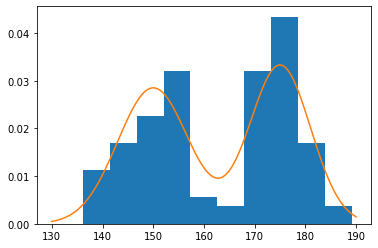

In [33]:
#Simulate a normal mixture

m1 = 150
s1 = 7

m2 = 175
s2 = 6

N = 100

result = []
for i in range(N):
    #First, flip a cint to check which distribution to sample from
    flip = np.random.choice(range(0,2))
    if flip == 0:
        sample = np.random.normal(m1, s1, 1)[0]
    else:
        sample = np.random.normal(m2, s2, 1)[0]
        
    result.append(sample)

plt.hist(result, density=True)

x= np.linspace(130,190,200)

y = 0.5*norm.pdf(x,m1,s1)+0.5*norm.pdf(x,m2,s2)
plt.plot(x,y)


## L5.4 The T-distribution

People sometimes complain that the normal distribution is thin tailed, and that 6-sigma events occur to frequently in real life situations. The T-distribution, is, however, fat tailed.

A random variable $X$ is said to have T-distribution if it has the following pdf

$$ \frac{\Gamma \left(\frac{\nu+1}{2} \right)} {\sqrt{\nu\pi}\,\Gamma \left(\frac{\nu}{2} \right)} \left(1+\frac{x^2}{\nu} \right)^{-\frac{\nu+1}{2}}$$

where the parameter $\nu$ is called the degrees of freedom. Its mean is 0 and variance is $\nu/(\nu-2)$ for $\nu > 2$

The T-distribution, sometiems called Student's T distribution was first published in 1908 by a worker in the Guinnes factory in connection with the best yielding varieties of barley in the brewery. It arises quite frequently in practice.

If we let 

$$\bar {X}=\frac {1}{n}\sum _{i=1}^{n}X_{i}$$

be the sample mean and

$$S^{2}=\frac {1}{n-1}\sum _{i=1}^{n}(X_{i}-\bar {X})^{2}$$

be the sample variance. Then the random variable (like a Z score)

$$\frac {\bar {X}-\mu }{S /{\sqrt {n}}}$$
has a T distribution with $n-1$ degrees of freedom.

When we perform linear regression, we often come accross the $T$ distribution and need to be able to use it to find the signficance of our parameter estimates. As the degress of freedom increases, the T distributions tends to the normal distribution.

In [36]:
import statsmodels.api as sm

spector_data = sm.datasets.spector.load()
spector_data.exog = sm.add_constant(spector_data.exog, prepend=False)
mod = sm.OLS(spector_data.endog, spector_data.exog)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     6.646
Date:                Mon, 11 Jul 2022   Prob (F-statistic):            0.00157
Time:                        17:12:23   Log-Likelihood:                -12.978
No. Observations:                  32   AIC:                             33.96
Df Residuals:                      28   BIC:                             39.82
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4639      0.162      2.864      0.0

## L5.5 Two continuous random variables and dependence

We can also sum two or more independent normal random variables and get other normal random variables (the means sum and the variance sum as well). We'll explore that when we look at transforms. Key word here is independent.

(array([4.19319497e-04, 2.69176064e-03, 1.21467390e-02, 2.80673534e-02,
        3.99841430e-02, 3.20847047e-02, 1.51225547e-02, 4.00382487e-03,
        6.76321769e-04, 6.76321769e-05]),
 array([265.7997261 , 273.19265685, 280.5855876 , 287.97851835,
        295.3714491 , 302.76437985, 310.1573106 , 317.55024135,
        324.9431721 , 332.33610285, 339.7290336 ]),
 <BarContainer object of 10 artists>)

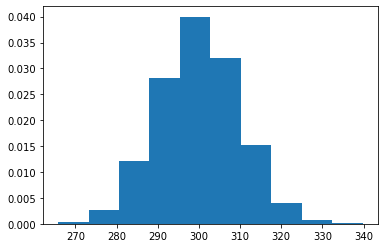

In [35]:
#Sums of two independent normals

m1 = 150
s1 = 7

m2 = 175
s2 = 6

N = 10000

sample1 = np.random.normal(m1, s1, N)
sample2 = np.random.normal(m1, s1, N)

sample = sample1+sample2

#Is it normal shaped?
plt.hist(sample, density=True)

The cumulative distribution function of two continuous random variables is

$$F_{X,Y}(x,y) = P(X \le x, Y \le y) = \int_{-\infty}^x{\int_{-\infty}^y{f_{X,Y}(x,y)dxdy}}$$

and also

$$f_{X,Y}(x,y) = \frac{\partial^2 F}{\partial x \partial y}$$

The expected value is 

$$E[g(X,Y)] = \int_{-\infty}^{\infty}{\int_{-\infty}^{\infty}{g(x,y)f_{X,Y}(x,y)dxdy}}$$

And the conditioning generalizes to continous random variables as before. For example,

$$f_{X|A}(x) = \frac{f_X(x)}{P(X \in A)}$$

$$f_{X|Y} = \frac{f_{X,Y}(x,y)}{f_Y(y)}$$

where the pdf now plays the role of the pmf in the discrete case. 

Two **independent** continuous random variables $X$ and $Y$ have

$$f_{X,Y}(x,y) = f_X(x)f_Y(y)$$

and it is simple to see that this implies

$$F_{X,Y}(x,y) = F_X(x)F_Y(y)$$

and 

$$E[g(X)h(Y)] = E[g(X)]E[h(Y)]$$

## Homework

1. Suppose $X$ has density function $f_X(x) = x/2$ for 0 < x < 2.

(a) Find the cumulative distribution function

(b) P(X < 1)

(c) P(X > 3/2)

2. Consider the random variable $X$ with pdf $f_X(x) = \frac{c}{2\sqrt{x}}$ in [0,1]

(a) Find $c$

(b) Find E[X]

3. Consider the one sided normal random variable $X$ with $x \ge 0$, mean $\mu >0$ and std $\sigma$. The pdf is $\phi (x) = \frac{c}{\sqrt{2\pi} \sigma}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$

(a) Find $c$

(b) Find $\mu$ in terms of the standard normal CDF ($\Phi$)


